# Companion Notebook
The `NSGA2Generator` can be run on multi-objective optimization problems purely from Xopt's YAML configuration files. This notebook demonstrates how to set up the configuration file, how to run the optimization algorithm, and how to load the data into python and plot the results. At the end, we demonstrate how to restart an optimization from one of `NSGA2Generator`'s checkpoint files.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import shutil

## Calling the Xopt Runner CLI Tool
Xopt includes a tool caled `xopt-run` which will load the Xopt object from the YAML configuration file and call `Xopt.run()` on it to perform the optimization until the termination condition is achieved.

In [2]:
# Run the optimizer (will take ~30s)
# We will run from the example directory containing `eval_fun.py` which is imported during our xopt run
! cd assets/yaml_runner_example && xopt-run nsga2_zdt3.yml 

## Loading and Plotting Data
The YAML file specified that data will be output to the directory `nsga2_output` within the working directory of the script (ie `assets/yaml_runner_example`). In here, there will be several files.
- `populations.csv`: Each completed population is recorded to this file
- `data.csv`: Contains all evaluated inviduals
- `log.txt`: A record of all log messages the genreator emitted during its run
- `vocs.txt`: A copy of the variable, objectives, and constraints (VOCs) definitions
- `checkpoints/`: This directory contains checkpoint files which are used with the `checkpoint_file` key of the generator to restart an optimization.

In [3]:
# Load every generation
df = pd.read_csv("assets/yaml_runner_example/nsga2_output/populations.csv")
df.head()

,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,...,x6,x7,x8,x9,f1,f2,xopt_generation,xopt_candidate_idx,xopt_runtime,xopt_error
0,0.929593,0.349530,0.434445,0.447617,0.973853,0.766307,0.561523,0.745432,0.976407,0.312298,...,0.021713,0.312777,0.363828,0.520316,0.929593,4.032545,1,18,0.000598,False
1,0.780311,0.404595,0.549240,0.056366,0.907044,0.402504,0.703350,0.729251,0.325427,0.582437,...,0.315786,0.555505,0.383997,0.991683,0.780311,4.139585,1,19,0.000598,False
2,0.757971,0.756164,0.611567,0.707639,0.578022,0.136457,0.233369,0.838893,0.632051,0.077796,...,0.508160,0.618541,0.073252,0.536904,0.757971,4.157865,1,41,0.000598,False
3,0.780615,0.772108,0.519817,0.384426,0.351884,0.969911,0.526203,0.549369,0.700340,0.494504,...,0.001700,0.935886,0.151036,0.660298,0.780615,4.021056,1,11,0.000598,False
4,0.545947,0.380308,0.681170,0.728675,0.884955,0.149653,0.571237,0.327733,0.664034,0.821038,...,0.563866,0.130539,0.611359,0.839575,0.545947,4.935832,1,9,0.000598,False


In [4]:
# Grab just the final generation
last_gen = df[df["xopt_generation"] == df["xopt_generation"].max()]
last_gen.head()

,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,...,x6,x7,x8,x9,f1,f2,xopt_generation,xopt_candidate_idx,xopt_runtime,xopt_error
4950,0.628733,0.016687,0.008312,0.016960,0.350809,0.011312,0.060953,0.025231,0.031589,0.004074,...,0.000416,0.023108,0.044699,0.050775,0.628733,-0.110521,100,4981,0.000372,False
4951,0.227845,0.025744,0.008475,0.013650,0.233201,0.034884,0.061951,0.025182,0.036284,0.053846,...,0.000274,0.041017,0.047865,0.029152,0.227845,0.576896,100,4881,0.000362,False
4952,0.826021,0.007364,0.005166,0.013570,0.201858,0.010251,0.060726,0.012165,0.021460,0.010575,...,0.001562,0.080763,0.059959,0.028052,0.826021,-0.366566,100,4949,0.000373,False
4953,0.217603,0.016605,0.007947,0.015394,0.345523,0.008467,0.061182,0.010032,0.023941,0.010355,...,0.004340,0.023631,0.022108,0.027825,0.217603,0.664096,100,4812,0.000373,False
4954,0.199894,0.016484,0.007176,0.015813,0.212890,0.010261,0.006619,0.025175,0.021646,0.013703,...,0.003253,0.071889,0.001759,0.027180,0.199894,0.758976,100,4906,0.000373,False


Text(0.5, 1.0, 'Generation 100')

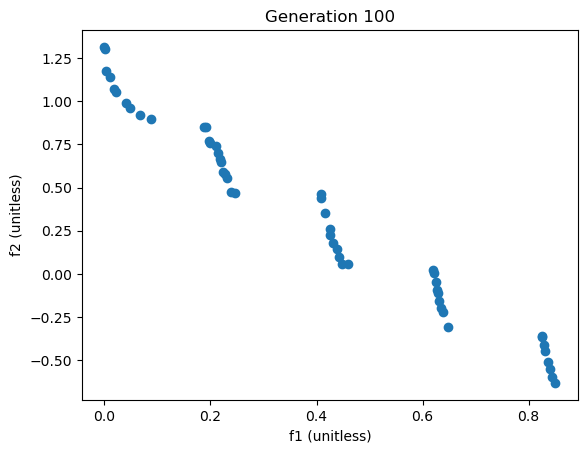

In [5]:
# Plot the objectives
plt.scatter(last_gen["f1"], last_gen["f2"])
plt.xlabel("f1 (unitless)")
plt.ylabel("f2 (unitless)")
plt.title(f"Generation {last_gen['xopt_generation'].max()}")

## Restoring from Checkpoints
In this section, we will restart the optimizer from one of its saved checkpoints. This allows us to carry on an optimization that was previously terminated with no loss of information. The checkpoint is specified in the YAML file using the key `checkpoint_file`. Any additional settings in the generator will override the settings included in the checkpoint. The evaluation function still needs to be defined and should be identical to what was used during the original run.

In [6]:
# Hack so you do not need to change the checkpoint filename in the config file manually for this tutorial
# In a real optimization, you will set `checkpoint_file` to the file of your choice
! cd assets/yaml_runner_example/nsga2_output/checkpoints &&  mv $(ls -1 | tail -n 1) 20250805_065102_1.txt

In [7]:
# Run the optimizer for another few generations (will take ~30s)
! cd assets/yaml_runner_example && xopt-run nsga2_from_checkpoint.yml 

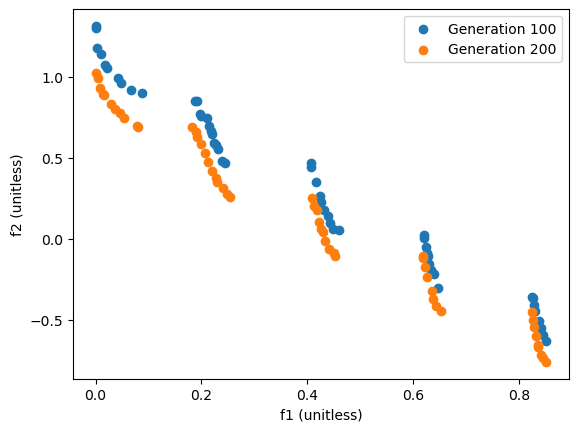

In [8]:
# Grab the last generation
df = pd.read_csv(
    "assets/yaml_runner_example/nsga2_from_checkpoint_output/populations.csv"
)
last_gen_restarted = df[df["xopt_generation"] == df["xopt_generation"].max()]

# Plot the objectives
plt.scatter(
    last_gen["f1"],
    last_gen["f2"],
    label=f"Generation {last_gen['xopt_generation'].max()}",
)
plt.scatter(
    last_gen_restarted["f1"],
    last_gen_restarted["f2"],
    label=f"Generation {last_gen_restarted['xopt_generation'].max()}",
)
plt.xlabel("f1 (unitless)")
plt.ylabel("f2 (unitless)")
plt.legend()

## Cleanup
We will now remove the files created in this notebook.

In [9]:
# Clean up the output directoris
shutil.rmtree("assets/yaml_runner_example/nsga2_output")
shutil.rmtree("assets/yaml_runner_example/nsga2_from_checkpoint_output")